In [26]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from classy import Class
from scipy.optimize import fsolve
from scipy.interpolate import interp1d
import math

In [27]:
font = {'size'   : 16, 'family':'STIXGeneral'}
axislabelfontsize='large'
matplotlib.rc('font', **font)
matplotlib.mathtext.rcParams['legend.fontsize']='medium'
plt.rcParams["figure.figsize"] = [8.0,6.0]

In [28]:
common_settings = {'output' : 'tCl',
                   'reio_parametrization': "reio_none",
                   # LambdaCDM parameters
                   'h':0.6781,
                   'omega_b':0.02238280,
                   'omega_cdm':0.1201075,
                   'A_s':2.100549e-09,
                   'n_s':0.9660499,
                   #'tau_reio':0.05430842,
                   'thermodynamics_verbose':1
                   }  
##############
#    
# call CLASS
#
###############
M = Class()
M.set(common_settings)
M.compute()
derived = M.get_current_derived_parameters(['tau_rec','conformal_age'])
thermo = M.get_thermodynamics()
print (thermo.keys())
print(thermo["z"].shape)

dict_keys(['z', 'conf. time [Mpc]', 'x_e', "kappa' [Mpc^-1]", 'exp(-kappa)', 'g [Mpc^-1]', 'Tb [K]', 'dTb [K]', 'w_b', 'c_b^2', 'tau_d'])
(28333,)


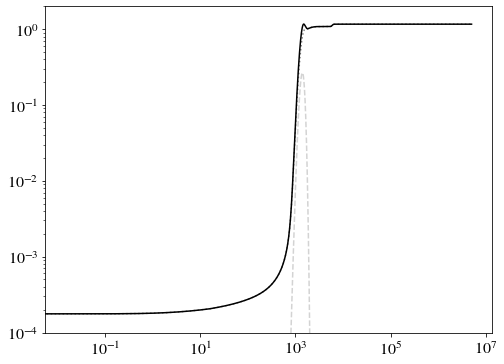

In [29]:
def gaussian(x, mean, sigma, amp):
    norm = 1./np.sqrt(2*np.pi*sigma**2)
    return amp*norm*np.exp(-(x-mean)**2 / (2*sigma**2)) 

z = thermo['z']
xe = thermo['x_e']

center=1400
spread =150
amp = 100

fig, ax = plt.subplots()

ax.plot(z, xe, color="gray", linestyle="dotted")
ax.plot(z, gaussian(z, center, spread, amp), color="lightgray", linestyle="dashed")

ax.plot(z, xe+gaussian(z, center, spread, amp), color="black")

ax.set_xscale("log")
ax.set_yscale("log")

ax.set_ylim([1e-4, 2])

filename = "xe_out.txt"

with open(filename, "w") as f:
    for i, xez in enumerate(xe):
        f.write("{0} {1}\n".format(z[i], xez+gaussian(z[i], center, spread, amp)))

(0.0001, 2)

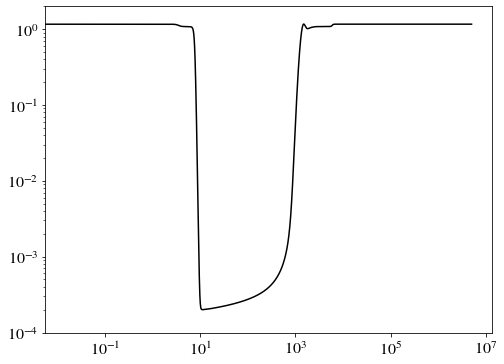

In [30]:
## Rerun with the above as input

common_settings = {'output' : 'tCl',
                   'use_external_xe': 'yes',
                   'xe_file': "xe_out.txt",
                   # LambdaCDM parameters
                   'h':0.6781,
                   'omega_b':0.02238280,
                   'omega_cdm':0.1201075,
                   'A_s':2.100549e-09,
                   'n_s':0.9660499,
                   'tau_reio':0.05430842,
                   'thermodynamics_verbose':1
                   }  
##############
#    
# call CLASS
#
###############
M = Class()
M.set(common_settings)
M.compute()
derived = M.get_current_derived_parameters(['tau_rec','conformal_age'])
thermo = M.get_thermodynamics()

z = thermo['z']
xe = thermo['x_e']

fig, ax = plt.subplots()

ax.plot(z, xe, color="black")

ax.set_xscale("log")
ax.set_yscale("log")

ax.set_ylim([1e-4, 2])